# ¿Cuál es la mejor tarifa?

## Descripción del proyecto
---

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Objetivo
El objetivo de este proyecto es evaluar el comportamiento de los clientes y determinar cuál tarifa de Megaline es más rentable.

Las acciones a realizar: 
- Paso 1: Cargar y explorar los datos
- Paso 2: Manipulación de datos
- Paso 3: Análisis de datos
- Paso 4: Pruebas de hipótesis
- Paso 5: Conclusiones

## Cargar y explorar los datos
---

En esta sección, comenzaremos cargando las bibliotecas necesarias y los datos proporcionados. Luego, realizaremos una exploración inicial del conjunto de datos para comprender su estructura. Esto incluirá:

- Verificar el tamaño del dataset (número de filas y columnas)
- Examinar los tipos de datos en cada columna
- Identificar la presencia de valores faltantes o atípicos que puedan requerir tratamiento antes de proceder con el análisis.

### Cargar ambiente
Importamos las bibliotecas esenciales para el análisis.

In [1]:
## Cargar el ambiente de trabajo
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar datasets
Leemos los archivos de datos proporcionados para cada dataset por analizar. 

In [2]:
# Cargar los datos en diferentes DataFrames

## Usuarios
df_users= pd.read_csv("../data/megaline_users.csv")

## Llamadas
df_calls= pd.read_csv("../data/megaline_calls.csv")

## Mensajes
df_messages= pd.read_csv("../data/megaline_messages.csv")

## Tráfico de datos
df_internet= pd.read_csv("../data/megaline_internet.csv")

## Tarifas
df_plans= pd.read_csv("../data/megaline_plans.csv")

### Exploración de datasets
En esta etapa, realizaremos un análisis preliminar de los datasets para comprender su estructura y calidad. 

#### Inspección de la base de datos **`users`**

In [3]:
## Visualización del df
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [4]:
## Información general 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_users.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated()])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [6]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_users.duplicated(subset="user_id").sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated(subset="user_id")])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [7]:
## Valores faltantes
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [8]:
## Estadísticas descriptivas para columnas numéricas
round(df_users.describe(),2)

,user_id,age
count,500.00,500.00
mean,1249.50,45.49
std,144.48,16.97
min,1000.00,18.00
25%,1124.75,30.00
50%,1249.50,46.00
75%,1374.25,61.00
max,1499.00,75.00


In [9]:
## Estadísticas descriptivas para columnas categóricas
df_users.describe(include="object")

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Wilkinson,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,2018-12-18
freq,3,3,80,5,339,3


El DataFrame de usuarios de Megaline contiene 500 observaciones y 8 variables, proporcionando tanto información personal de los clientes como datos sobre su interacción con la compañía.

Durante la exploración inicial, identificamos los siguientes problemas:

- La columna `city` incluye información adicional de la localidad que no corresponde solo a la ciudad.
- Las columnas `reg_date` y `churn_date` están formateadas como tipo objeto en lugar de tipo fecha.
- La columna `churn_date` presenta 466 valores faltantes.
- La variable `plan` podría ser más específica en cuanto a los tipos de plan.

No encontramos duplicados explícitos en el dataset. Para los duplicados implícitos, analizamos únicamente la columna `user_id`, ya que se supone que este identificador no debe repetirse.

En cuanto a los clientes, las edades oscilan entre 18 y 75 años, con una media de 46 años. El nombre más común es *Jasper* y el apellido más frecuente es *Caldwell*. Verificamos que no hubiera más de un cliente llamado *Jasper Caldwell*. La mayoría de los usuarios están suscritos al plan `surf`.

#### Inspección de la base de datos **`calls`**

In [10]:
## Visualización del df
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [11]:
## Información general 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_calls.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [13]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_calls.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [14]:
## Valores faltantes
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [15]:
## Estadísticas descriptivas para columnas numéricas
round(df_calls.describe(),2)

,user_id,duration
count,137735.00,137735.00
mean,1247.66,6.75
std,139.42,5.84
min,1000.00,0.00
25%,1128.00,1.29
50%,1247.00,5.98
75%,1365.00,10.69
max,1499.00,37.60


In [16]:
## Estadísticas descriptivas para columnas categóricas
df_calls.describe(include="object")

,id,call_date
count,137735,137735
unique,137735,351
top,1499_203,2018-12-27
freq,1,1091


El DataFrame de las llamadas con Megaline contiene 137,735 observaciones y 4 variables, con información sobre las llamadas realizadas durante el año 2018.

Durante la revisión inicial, identificamos los siguientes problemas:

- La columna `duration` no especifica las unidades de medida.
- La columna `call_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada llamada.

No se encontraron duplicados explícitos en el dataset. Para los duplicados implícitos, analizamos únicamente la columna `id`, ya que este identificador debe ser único. Tampoco se identificaron valores ausentes.

En cuanto a las llamadas, observamos que tienen una duración promedio de 6.75 minutos, variando entre 0 y 37.6 minutos. El registro de llamadas comienza el *15 de enero de 2018* y finaliza el *31 de diciembre de 2018*. La fecha con mayor número de llamadas fue el *27 de diciembre de 2018*, probablemente debido a las celebraciones de Navidad y Año Nuevo.

#### Inspección de la base de datos **`messages`**

In [17]:
## Visualización del df
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
## Información general 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_messages.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [20]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_messages.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [21]:
## Valores faltantes
print(df_messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [22]:
## Estadísticas descriptivas para columnas categóricas
df_messages.describe(include="object")

,id,message_date
count,76051,76051
unique,76051,351
top,1497_613,2018-12-28
freq,1,702


El DataFrame de los mensajes de Megaline contiene 76,051 observaciones y 3 variables, con información sobre los mensajes enviados durante el año 2018.

Durante la exploración inicial, identificamos los siguientes problemas:

- La columna `message_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada mensaje.

No se encontraron duplicados explícitos. Para los duplicados implícitos, analizamos solo la columna `id`, ya que se espera que este identificador sea único. Tampoco se identificaron valores ausentes en el dataset.

En cuanto a los mensajes, los registros comienzan el *15 de enero de 2018* y finalizan el *31 de diciembre de 2018*, de forma similar al dataset de las llamadas. La fecha con mayor actividad fue el *28 de diciembre de 2018*, un patrón cercano al observado en las llamadas, posiblemente vinculado con las celebraciones de Navidad y Año Nuevo.

#### Inspección de la base de datos **`internet`**

In [23]:
## Visualización del df
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [24]:
## Información general 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_internet.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [26]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_internet.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [27]:
## Valores faltantes
print(df_internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [28]:
## Estadísticas descriptivas para columnas numéricas
round(df_internet.describe(),2)

,user_id,mb_used
count,104825.00,104825.00
mean,1242.50,366.71
std,142.05,277.17
min,1000.00,0.00
25%,1122.00,136.08
50%,1236.00,343.98
75%,1367.00,554.61
max,1499.00,1693.47


In [29]:
## Estadísticas descriptivas para columnas categóricas
df_internet.describe(include="object")

,id,session_date
count,104825,104825
unique,104825,351
top,1499_219,2018-12-24
freq,1,851


In [30]:
print(df_internet["session_date"].sort_values().head())
print()
print(df_internet["session_date"].sort_values().tail())

17220    2018-01-15
17098    2018-01-15
17135    2018-01-16
17051    2018-01-16
44475    2018-01-17
Name: session_date, dtype: object

69664    2018-12-31
89875    2018-12-31
11395    2018-12-31
70988    2018-12-31
26960    2018-12-31
Name: session_date, dtype: object


El DataFrame de tráfico de datos de Megaline contiene 104,825 observaciones y 4 variables, que detallan el uso de internet de los clientes durante el año 2018.

Durante la revisión inicial, identificamos los siguientes problemas:

- La columna `session_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no especifica claramente que es el identificador de cada sesión de internet.
- La columna `mb_used` podría ser convertida de megabytes a gigabytes para una mayor claridad.

No se encontraron duplicados explícitos en el dataset. Para los duplicados implícitos, revisamos únicamente la columna `id`, que debería ser única. Tampoco se detectaron valores ausentes.

En cuanto al uso de internet, los registros abarcan desde el *15 de enero de 2018* hasta el *31 de diciembre de 2018*, coincidiendo con los periodos de las bases de datos de llamadas y mensajes. La fecha con mayor actividad fue el *24 de diciembre de 2018*, probablemente debido a las festividades de Nochebuena.

#### Inspección de la base de datos **`plans`**

In [31]:
## Visualización del df
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [32]:
## Información general 
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [33]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_plans.duplicated().sum())

0


In [34]:
## Valores faltantes
print(df_plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


El DataFrame de planes tarifarios de Megaline contiene solo 2 observaciones y 8 variables, proporcionando detalles sobre las características de los planes ofrecidos por la compañía.

Durante la revisión, identificamos los siguientes aspectos que podrían mejorarse:

- La variable `mb_per_month_included` podría describirse de manera más clara.
- Las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` podrían tener nombres más descriptivos para reflejar mejor el costo de cada servicio.
- La variable `mb_included` podría convertirse a gigabytes para mayor claridad.

Aunque la base de datos es pequeña, realizamos una revisión de valores duplicados y ausentes, sin encontrar problemas.

Con base en la inspección de los datos, se puede inferir que el plan `surf` es una opción más económica, mientras que el plan `ultimate` parece ser un paquete más exclusivo.

## Manipulación de datos
---
En esta etapa, abordamos los errores identificados en los diferentes DataFrames, lo que nos permite preparar los datos para un análisis más adecuado.

### Manipulación base de datos **`users`**

Los errores observados en la tabla de usuaris fueron los siguientes: 
- La columna `city` incluye información adicional de la localidad que no corresponde solo a la ciudad.
- Las columnas `reg_date` y `churn_date` están formateadas como tipo objeto en lugar de tipo fecha.
- La columna `churn_date` presenta 466 valores faltantes.
- La variable `plan` podría ser más específica en cuanto a los tipos de plan.

1. Para la variable `city` observamos que contiene información sobre la ciudad, el estado y sobre el área estadística metropolitana o *metropolitan statistical area* (MSA). Separamos la información en distintas columnas. 

In [35]:
# Separar la columna `city`
## Dividir columna en ciudad estado y entidad geográfica utilizando expresiones regulares:
# Ciudad: ^(.*?); cualquier texto antes de la coma.
# Estado: ([A-Z]{2}(?:-[A-Z]{2})*); permite estados compuestos como NY-NJ-PA.
# Entidad geográfica: (\w+)$; parte final (como "MSA").

df_users[["city_fixed", "state", "geographical_entity"]] = df_users["city"].str.extract(r"^(.*?),\s([A-Z]{2}(?:-[A-Z]{2})*)\s(\w+)$")

## Visualización de las nuevas columnas
df_users[["city_fixed", "state", "geographical_entity"]].head()

,city_fixed,state,geographical_entity
0,Atlanta-Sandy Springs-Roswell,GA,MSA
1,Seattle-Tacoma-Bellevue,WA,MSA
2,Las Vegas-Henderson-Paradise,NV,MSA
3,Tulsa,OK,MSA
4,Seattle-Tacoma-Bellevue,WA,MSA


In [36]:
## Estadísticas descriptivas para columnas 
df_users[["city_fixed", "state", "geographical_entity"]].describe(include="object")

,city_fixed,state,geographical_entity
count,500,500,500
unique,73,42,1
top,New York-Newark-Jersey City,NY-NJ-PA,MSA
freq,80,80,500


2. Para la variables `reg_date` hicimos la conversión de tipo objeto a tipo fecha. 

In [37]:
## Convertir tipo de columna
df_users["reg_date"]= pd.to_datetime(df_users["reg_date"])

3. Para la variable `churn_date`, suponemos que los clientes sin una fecha de cancelación registrada **continuaron activos** hasta finales de 2018.

    Primero, aprovechamos los valores faltantes para crear una nueva variable categórica llamada `client_status`, asignando el valor activo a aquellos registros que no tienen una fecha de cancelación.

    A continuación, imputamos la fecha `2019-01-01` en los valores faltantes de `churn_date`.   

> Es importante comentar y revisar estos pasos con el supervisor.


In [38]:
# Etiquetado de los clientes de acuerdo a su estatus e
## Creación función de etiquetado
def asignar_estado(row):
    if pd.isna(row["churn_date"]):
        return "Activo"
    else:
        return "Baja"

## Implementación de la función
df_users["client_status"] = df_users.apply(asignar_estado, axis=1)

In [39]:
# Imputación de las fechas NA
## Rellenar laos Nas fecha posterior a 2018
df_users["churn_date"] = df_users["churn_date"].fillna("2019-01-01")

## Convertir tipo de columna
df_users["churn_date"]= pd.to_datetime(df_users["churn_date"])

4. Finalmente renombramos el nombre de la variable `plans` por algo más informativo. 

In [40]:
## Renombrar la columna 
df_users= df_users.rename(columns={"plan": "plan_name"})

In [41]:
## Estadísticas descriptivas para columnas categóricas
df_users.describe(include="object")

,first_name,last_name,city,plan_name,city_fixed,state,geographical_entity,client_status
count,500,500,500,500,500,500,500,500
unique,458,399,73,2,73,42,1,2
top,Seymour,Wilkinson,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,New York-Newark-Jersey City,NY-NJ-PA,MSA,Activo
freq,3,3,80,339,80,80,500,466


Los pasos realizados en la tabla de usuarios fueron los siguientes:

1. Separamos la columna `city` en tres columnas: ciudad, estado y tipo de entidad geográfica.
2. Convertimos la variable `reg_date` al tipo de fecha.
3. Convertimos la variable `churn_date` al tipo de fecha e imputamos los 466 valores ausentes con la fecha activa "2019-01-01".
4. Creamos la variable `client_status`, que proporciona información sobre el estado del cliente en la compañía.
5. Cambiamos el nombre de la variable `plan` para que sea más coherente con otra base de datos.

Gracias a estos cambios, pudimos obtener nueva información. Por ejemplo, identificamos 73 ciudades, siendo New York-Newark-Jersey City la más frecuente. Entre los 42 estados, el más común fue NY-NJ-PA, y no registramos usuarios con una entidad geográfica diferente a MSA. Además, la gran mayoría de los clientes permanecieron activos hasta el 31 de diciembre de 2018, como habíamos observado previamente.

### Manipulación base de datos **`calls`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `duration` no especifica las unidades de medida.
- La columna `call_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada llamada.

1. Renombrar las columnas `duration` e `id` para hacerlas más específicas. 

In [42]:
## Renombrar las columnas 
df_calls= df_calls.rename(columns={"id": "call_id","duration": "call_duration_minutes"})

2. Convertir el tipo de columna `call_date` a tipo fecha. 

In [43]:
## Convertir tipo de columna
df_calls["call_date"]= pd.to_datetime(df_calls["call_date"])

Los pasos realizados en la tabla de llamadas fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Definimos las unidades para la duración de llamadas de la variable `duration`.
- Convertimos la variable `call_date` al tipo de fecha.

### Manipulación base de datos **`messages`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `id` no deja claro que se refiere al identificador de cada mensaje.
- La columna `message_date` está almacenada como tipo objeto en lugar de tipo fecha.

1. Renombrar la columna `id` para hacerla más específica. 

In [44]:
## Renombrar las columnas 
df_messages= df_messages.rename(columns={"id": "message_id"})

2. Convertir el tipo de columna `message_date` a tipo fecha. 

In [45]:
## Convertir tipo de columna
df_messages["message_date"]= pd.to_datetime(df_messages["message_date"])

Los pasos realizados en la tabla de mensajes fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Convertimos la variable `message_date` al tipo de fecha.

### Manipulación base de datos **`internet`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `session_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no especifica claramente que es el identificador de cada sesión de internet.
- La columna `mb_used` podría ser convertida de megabytes a gigabytes para una mayor claridad.

1. Renombrar la columna `id` para hacerla más específica. 

In [46]:
## Renombrar las columnas 
df_internet= df_internet.rename(columns={"id": "internet_id"})

2. Convertir el tipo de columna `session_date` a tipo fecha. 

In [47]:
## Convertir tipo de columna
df_internet["session_date"]= pd.to_datetime(df_internet["session_date"])

3. Transformar el consumo de Mb utilizados a Gb.

In [48]:
## Convertir unidades mb a gb
df_internet["gb_used"]= round(df_internet["mb_used"]/ 1024.2)

Los pasos realizados en la tabla de tráfico de internet fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Convertimos la variable `session_date` al tipo de fecha.
- Creamos la variable `gb_used` al convertir megabytes (Mb) a gigabytes (Gb).

### Manipulación base de datos **`plans`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `mb_per_month_included` podría describirse de manera más clara.
- Las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` podrían tener nombres más descriptivos para reflejar mejor el costo de cada servicio.
- La variable `mb_included` podría convertirse a gigabytes para mayor claridad.

1. Renombramos las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` para tener una mejor conotación. 

In [49]:
## Renombrar las columnas 
df_plans= df_plans.rename(columns={
    "usd_monthly_pay": "monthly_fee_usd", 
    "mb_per_month_included": "mb_included", 
    "usd_per_minute": "minutes_extra_price", 
    "usd_per_message": "message_extra_price",
    "usd_per_gb": "gb_extra_price"
    })

2. Transformamos los Mb incluidos a Gb. 

In [50]:
## Convertir los mb incluidos a Gb
df_plans["gb_included"]= round(df_plans["mb_included"]/ 1024.2)

Los pasos realizados en la tabla de planes fueron los siguientes:

- Especificamos el nombre de las columnas `mb_per_month_included`, `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message`. 
- Creamos la variable `gb_included` al convertir megabytes (Mb) a gigabytes (Gb).

## Análisis de datos
En esta sección, realizamos un análisis de los datos de clientes, llamadas, mensajes y tráfico de internet para determinar cuál de las tarifas de Megaline es más rentable.

### Estudiar las condiciones de las tarifas
Antes de comenzar el análisis, estudiamos las condiciones de las tarifas Surf y Ultimate para comprender sus características y beneficios.  

In [51]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)

   messages_included  mb_included  minutes_included  monthly_fee_usd  \
0                 50        15360               500               20   
1               1000        30720              3000               70   

   gb_extra_price  message_extra_price  minutes_extra_price plan_name  \
0              10                 0.03                 0.03      surf   
1               7                 0.01                 0.01  ultimate   

   gb_included  
0         15.0  
1         30.0  


### Agregar datos por usuario
Realizamos los resumenes de datos, agregando los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

#### Número de llamadas mensuales por cliente

In [52]:
# Número de llamadas hechas por cada usuario al mes
## Determinar el mes 
df_calls["month"] = df_calls["call_date"].dt.month

## Calcular el número de llamadas al mes por usuario
total_calls_user = df_calls.groupby(["user_id", "month"])["call_id"].count().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_calls_user = total_calls_user.rename(columns={"call_id": "total_calls"})

## Visualización del df
print(total_calls_user.head())
print()

print("Número de llamadas registradas: ", total_calls_user.shape[0])

   user_id  month  total_calls
0     1000     12           16
1     1001      8           27
2     1001      9           49
3     1001     10           65
4     1001     11           64

Número de llamadas registradas:  2258


#### Número de minutos mensuales por cliente 

In [53]:
# Cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
## Calcular la cantidad de minutos usados por cada usuario al mes
total_minutes_user = df_calls.groupby(["user_id", "month"])["call_duration_minutes"].sum().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_minutes_user = total_minutes_user.rename(columns={"call_duration_minutes": "total_minutes"})

## Visualización del df
print(total_minutes_user.head())

   user_id  month  total_minutes
0     1000     12         116.83
1     1001      8         171.14
2     1001      9         297.69
3     1001     10         374.11
4     1001     11         404.59


#### Número de mensajes mensuales por cliente

In [54]:
# Número de mensajes enviados por cada usuario al mes
## Determinar el mes 
df_messages["month"] = df_messages["message_date"].dt.month

## Calcular el número de mensajes al mes por usuario
total_messages_user = df_messages.groupby(["user_id", "month"])["message_id"].count().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_messages_user = total_messages_user.rename(columns={"message_id": "total_messages"})

## Visualización del df
print(total_messages_user.head())
print()

print("Número de mensajes registrados: ", total_messages_user.shape[0])

   user_id  month  total_messages
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36

Número de mensajes registrados:  1806


#### Número de flujo de datos mensuales por cliente

In [55]:
# Volumen de tráfico de messages por cada usuario al mes
## Determinar el mes 
df_internet["month"] = df_internet["session_date"].dt.month

## Calcula el volumen del tráfico de Internet por usuario
total_internet_user = df_internet.groupby(["user_id", "month"])[["mb_used", "gb_used"]].sum().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_internet_user = total_internet_user.rename(columns={"mb_used": "total_internet_mb", "gb_used": "total_internet_gb"})

## Visualización del df
print(total_internet_user.head())
print()

   user_id  month  total_internet_mb  total_internet_gb
0     1000     12            1901.47                2.0
1     1001      8            6919.15                5.0
2     1001      9           13314.82                8.0
3     1001     10           22330.49               20.0
4     1001     11           18504.30               13.0



#### Información consumo telefónico por cliente

Para tener una noción del consumo que tienen los clientes de la compañía juntamos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [56]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
## Llamadas y minutos
total_user_info = total_calls_user.merge(total_minutes_user, on = ["user_id", "month"], how = "outer")

## Mensajes
total_user_info = total_user_info.merge(total_messages_user, on = ["user_id", "month"], how = "outer")

## Internet
total_user_info = total_user_info.merge(total_internet_user, on = ["user_id", "month"], how = "outer")

In [57]:
# Añade la información de la tarifa
total_user_info = df_users[["user_id", "plan_name"]].merge(total_user_info, on = "user_id", how = "outer")

total_user_info.head()

,user_id,plan_name,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb
0,1000,ultimate,12.0,16.0,116.83,11.0,1901.47,2.0
1,1001,surf,8.0,27.0,171.14,30.0,6919.15,5.0
2,1001,surf,9.0,49.0,297.69,44.0,13314.82,8.0
3,1001,surf,10.0,65.0,374.11,53.0,22330.49,20.0
4,1001,surf,11.0,64.0,404.59,36.0,18504.30,13.0


### Calculo mensual por usuario

Una vez que tenemos los datos agregados de las llamadas, mensajes y tráfico por usuario, calcula los ingresos mensuales en una nueva variable llamada `monthly_revenue`. Para ello, restamos el límite del plan gratuito el número total de llamadas, mensajes de texto y datos. Posteriormente multiplicamos cada resultado por el valor del plan de llamadas. Seguimos una serie de paso para poder obtener el total de inngresos por cleinte seguimos los siguientes pasos: 

1. Inpeccionamos la base de datos que contiene los datos agregados por usuario. 

In [58]:
# Inspección de valores faltantes
total_user_info.isna().sum()

user_id                0
plan_name              0
month                 10
total_calls           45
total_minutes         45
total_messages       497
total_internet_mb     26
total_internet_gb     26
dtype: int64

Notamos que existían valores faltantes a lo largo del Dataset creado. Por un lado, existen registros donde no se tiene información sobre el mes. Por otro lado, tenemos información faltante sobre llamadas, mensajes e internet. Esto puede ser debido al comportamiento único de cada cliente; Por ejemplo, existen clientes que no registran mensajes pero si llamadas y uso de interne. 

2. Eliminamos los valores donde no tenemos información sobre los meses e imputamos los valores donde no existe registro con 0, entendiendo que el usuario no hace uso de ese servicio. 

> Corroborar con el supervisor la eliminación e imputación de valores. 

In [59]:
## Eliminar datos sin información de meses
total_user_info.dropna(subset=["month"], inplace=True)

## Rellenar valores con 0
total_user_info.fillna(0, inplace=True)

## Convertimos a entero
total_user_info["month"] = total_user_info["month"].astype(int)

3. Aunque pueden existir otras maneras, quizás más sencillas. Decidimos unir la información de los planes al DataFrame con la información de cada usuario. 

In [60]:
## Unión características del plan
total_user_info = total_user_info.merge(df_plans, on = "plan_name", how = "outer")

total_user_info

,user_id,plan_name,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb,messages_included,mb_included,minutes_included,monthly_fee_usd,gb_extra_price,message_extra_price,minutes_extra_price,gb_included
0,1001,surf,8,27.0,171.14,30.0,6919.15,5.0,50,15360,500,20,10,0.03,0.03,15.0
1,1001,surf,9,49.0,297.69,44.0,13314.82,8.0,50,15360,500,20,10,0.03,0.03,15.0
2,1001,surf,10,65.0,374.11,53.0,22330.49,20.0,50,15360,500,20,10,0.03,0.03,15.0
3,1001,surf,11,64.0,404.59,36.0,18504.30,13.0,50,15360,500,20,10,0.03,0.03,15.0
4,1001,surf,12,56.0,392.93,44.0,19369.18,12.0,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1493,ultimate,9,66.0,505.13,0.0,14991.17,12.0,1000,30720,3000,70,7,0.01,0.01,30.0
2289,1493,ultimate,10,66.0,424.25,0.0,16329.57,11.0,1000,30720,3000,70,7,0.01,0.01,30.0
2290,1493,ultimate,11,73.0,472.15,0.0,15630.78,12.0,1000,30720,3000,70,7,0.01,0.01,30.0
2291,1493,ultimate,12,65.0,446.28,0.0,15289.09,16.0,1000,30720,3000,70,7,0.01,0.01,30.0


4. Con la Dataframe con la información del consumo por usuario mensual y con la información de su plan, realizamos el cálculo de cada servicio excedido con su respectivo costro extra. De esta manera calculamos el ingreso total mensual por usuario. 

In [61]:
# Calcula el ingreso mensual para cada usuario
## Calcular los extras
### Minutos adicionales
total_user_info["extra_minutes"] = np.maximum(0, np.ceil(total_user_info["total_minutes"]-total_user_info["minutes_included"]))

### Costo extra por minutos excedidos
total_user_info["extra_minutes_cost"] = total_user_info["extra_minutes"]* total_user_info["minutes_extra_price"]

### Mensajes adicionales
total_user_info["extra_messages"] = np.maximum(0, total_user_info["total_messages"]-total_user_info["messages_included"])

### Costo extra por mensajes excedidos
total_user_info["extra_messages_cost"] = total_user_info["extra_messages"]* total_user_info["message_extra_price"]

### Gb adicionales
total_user_info["extra_gb"] = np.maximum(0, np.ceil(total_user_info["total_internet_gb"]-total_user_info["gb_included"]))

### Costo extra por Gb excedidos
total_user_info["extra_gb_cost"] = total_user_info["extra_gb"]* total_user_info["gb_extra_price"]


## Calculo ingreso mensual
total_user_info["monthly_revenue"]= total_user_info["monthly_fee_usd"] + total_user_info["extra_minutes_cost"]+ total_user_info["extra_messages_cost"]+ total_user_info["extra_gb_cost"]

# Mostrar los ingresos mensuales calculados
total_user_info

,user_id,plan_name,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb,messages_included,mb_included,...,message_extra_price,minutes_extra_price,gb_included,extra_minutes,extra_minutes_cost,extra_messages,extra_messages_cost,extra_gb,extra_gb_cost,monthly_revenue
0,1001,surf,8,27.0,171.14,30.0,6919.15,5.0,50,15360,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
1,1001,surf,9,49.0,297.69,44.0,13314.82,8.0,50,15360,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,surf,10,65.0,374.11,53.0,22330.49,20.0,50,15360,...,0.03,0.03,15.0,0.0,0.0,3.0,0.09,5.0,50.0,70.09
3,1001,surf,11,64.0,404.59,36.0,18504.30,13.0,50,15360,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
4,1001,surf,12,56.0,392.93,44.0,19369.18,12.0,50,15360,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1493,ultimate,9,66.0,505.13,0.0,14991.17,12.0,1000,30720,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2289,1493,ultimate,10,66.0,424.25,0.0,16329.57,11.0,1000,30720,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2290,1493,ultimate,11,73.0,472.15,0.0,15630.78,12.0,1000,30720,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2291,1493,ultimate,12,65.0,446.28,0.0,15289.09,16.0,1000,30720,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00


### Estudia el comportamiento de usuario

Examinamos el comportamiento de los clientes en función de su tarifa, evaluando variables como la duración de las llamadas, la cantidad de mensajes enviados y el uso de datos. Calculamos algunas estadísticas descriptivas para los datos agregados y fusionados que fueran útiles y que mostraran un panorama general captado por los datos. Además, realizamos gráficos útiles para facilitar su comprensión.

#### Comportamiento de llamadas
El objetivo es compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

> Entiendo que por la instrucción de utilizar los datos agregados y fusionados que realizamos en el paso anterior nos pide **el promedio del total de llamadas mensuales** por plan. 
> 
> De otro modo el enfoque sería utilizando la DataFrame de las llamadas por usuario para que generaramos **el promedio mensual de llamadas por usuario** de acuerdo con el plan. 

In [67]:
## Seleccion de la información del plan de los usuarios
calls_by_plan = total_user_info[["user_id", "month", "plan_name","total_minutes"]]

## Generar resumen de datos
calls_sumamry = calls_by_plan.groupby(["plan_name", "month"]).agg({
    "total_minutes": ["size", "mean", "std", "median", "min", "max"]
})

calls_sumamry.round(1).sort_values(by=["month","plan_name"],ascending=True).reset_index()

plan_name month total_minutes                                    
                            size   mean    std median    min     max
0       surf     1             2  192.8  121.6  192.8  106.8   278.8
1   ultimate     1             4  183.2  122.4  221.4   14.7   275.1
2       surf     2             9  280.9  216.7  240.7   36.8   769.0
3   ultimate     2             7  379.9  261.8  398.3    0.0   737.2
4       surf     3            23  311.0  178.4  312.8   33.4   739.0
5   ultimate     3            12  285.7  233.0  236.4   20.6   663.2
6       surf     4            50  332.4  213.6  320.1   15.7   991.2
7   ultimate     4            21  316.5  176.2  283.5   49.4   703.2
8       surf     5            77  377.1  230.8  387.4    0.0   995.6
9   ultimate     5            29  383.7  198.2  385.5   21.2   817.7
10      surf     6            97  407.2  201.9  400.3    0.0   975.6
11  ultimate     6            47  349.8  194.7  377.2    0.0   755.2
12      surf     7           121  424.5  233.3  430.1    0.0  1112.9
13  ultimate     7            59  403.8  254.6  403.4   14.0  1123.1
14      surf     8           162  387.2  220.5  367.1    0.0  1043.2
15  ultimate     8            71  397.3  218.4  388.2   11.0  1208.6
16      surf     9           194  391.0  203.9  401.5    0.0  1146.2
17  ultimate     9            86  413.3  225.8  410.2   16.8  1159.3
18      surf    10           237  405.7  216.2  407.6    0.0  1163.3
19  ultimate    10           106  425.2  219.9  430.6    0.0  1137.0
20      surf    11           283  399.6  214.7  392.1    0.0  1234.6
21  ultimate    11           127  420.5  232.9  409.6    0.0  1133.6
22      surf    12           318  447.5  238.7  424.4    0.0  1431.2
23  ultimate    12           151  433.0  236.2  414.4    0.0  1292.1

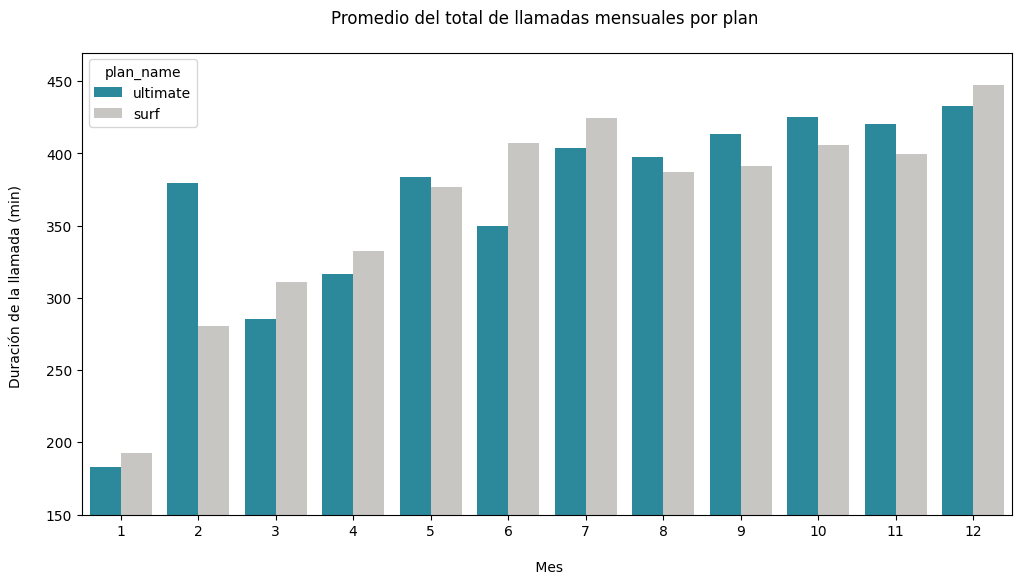

In [193]:
# Gráfico de barras para la media de minutos por plan y mes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}


sns.barplot(data=calls_sumamry, 
            x="month", y=("total_minutes", "mean"), 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Promedio del total de llamadas mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("Duración de la llamada (min) \n")
plt.ylim(150, None)
plt.show()

De manera general observamos que la duración total promedio de las llamadas tiende a aumentar mes con mes para ambos planes.

- El plan **Surf** muestra un aumento constante en el promedio del total de las llamadas desde enero. Este comportamiento alcanza un pico en julio y, posteriormente, muestra una ligera disminución en agosto. Sin embargo, luego experimenta otro crecimiento en diciembre, mes donde alcanza un máximo de 447.5 minutos. 

- El plan **Ultimate** muestra un pico de promedio de la duración total en febrero, seguido de un crecimiento constante hasta junio. No obstante, observamos una ligera dismunución. Posterior a Julio, el plan Ultimate repunta en agosto, con un crecimiento constante hasta diciembre, donde se alcanza el punto máximo de 433 minutos. 

Durante el primer semestre, la duración total de las llamadas es generalmente mayor en el plan Surf, excepto en febrero y mayo. Por otro lado, el segundo semestre, el plan Ultimate muestra un promedio en la duración de las llamadasmayor al plan Surf, salvo julio y diciembre. 

Es posible que el comportamiento se encuentre relacionado con factores estacionales o promociones de la compañia. Es necesario corroborar esta observación con el supervisor.  

In [69]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
## Agrupamos el total de minutos que necesita cada usuario de manera mensual. 
minutes_by_plan= total_user_info.groupby(by=["user_id", "plan_name", "month"])["total_minutes"].sum().reset_index()


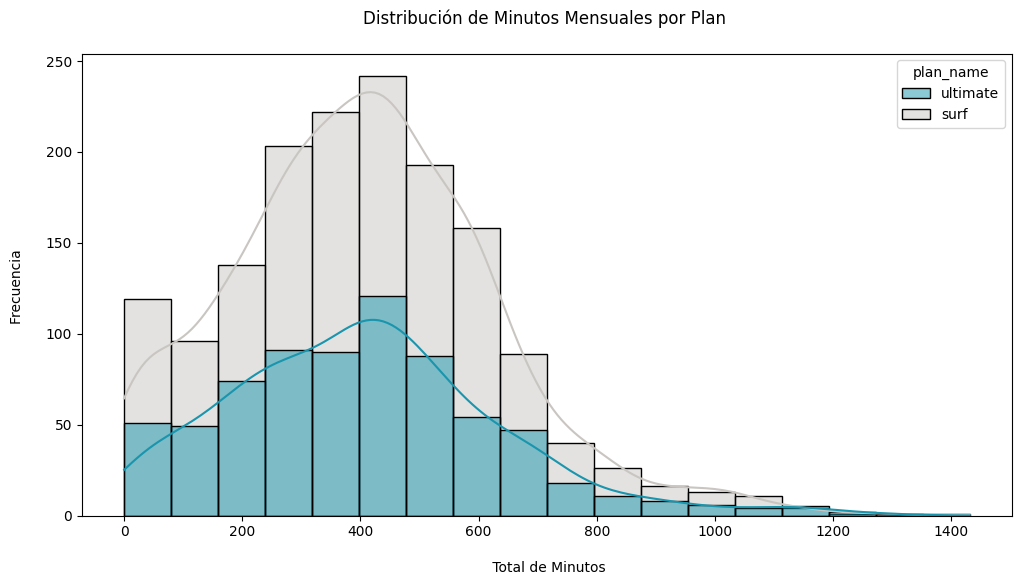

In [192]:
# Gráfico de barras para la media de minutos por plan y mes
## Customización
plt.figure(figsize=(12,6))
custom_palette= ["#1995AD" , "#c9c6c2"]

sns.histplot(data=minutes_by_plan, 
            x="total_minutes",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette,kde =True,
            bins=18,alpha=0.5)
plt.title("Distribución de Minutos Mensuales por Plan \n")
plt.xlabel(" \n Total de Minutos")
plt.ylabel("Frecuencia \n")
plt.show()

En general, observamos que la distribución de los minutos mensuales en ambos grupos es bastante similar, aunque la frecuencia podría variar debido al tamaño de la muestra. Mientras que el plan Surf es más popular, siendo utilizado por el 68% de los usuarios, el 32% restante prefiere el plan Ultimate. 

Esta observación podría reflejar que los clientes prefieren optar por un plan telefónico más económico. 

En ambos gráficos, la distribución se asemeja a una normal y exhiben un sesgo positivo, lo que podría indicar que una parte de los usuarios tiende a utilizar más minutos de los que se incluyen en las tarifas. El plan Ultimate presenta una mayor variabilidad en los datos, sugiriendo que los usuarios de este plan tienen patrones de uso más diversos.  

Para comparar si los usuarios de los distintos planes se comportan de manera diferente al realizar sus llamadas. Calculamos la media y la variación de la duración de las llamadas para cada plan.

In [101]:
# Calcula la media y la varianza de la duración mensual de llamadas.
## Crear la base de datos con la duración de las llamadas
duration_by_plan= total_user_info[["user_id", "plan_name"]]
duration_by_plan = duration_by_plan.merge(df_calls, on = "user_id", how = "outer")

## Eliminar los datos sin información
duration_by_plan.dropna(subset=["call_duration_minutes"], inplace=True)

## Calcular la media y la varianza de la duración mensual de llamadas
duration_suummary= duration_by_plan.groupby("plan_name")["call_duration_minutes"].agg(["mean", "var", "std"]).reset_index().round(2)

print(duration_suummary)

  plan_name  mean    var   std
0      surf  6.77  34.13  5.84
1  ultimate  6.70  33.99  5.83


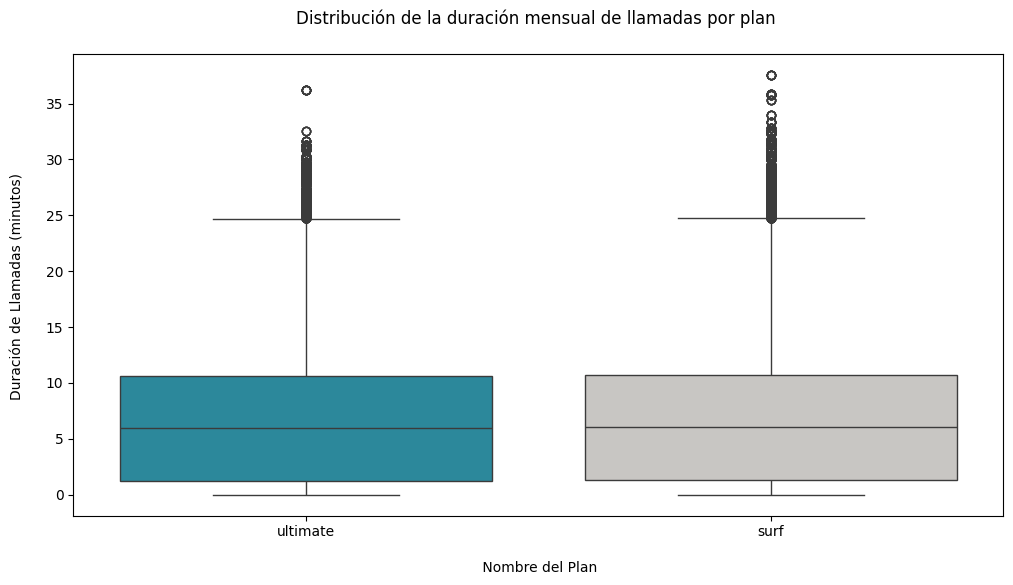

In [196]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}

sns.boxplot(data=duration_by_plan, 
            x="plan_name", y="call_duration_minutes", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Distribución de la duración mensual de llamadas por plan \n")
plt.xlabel(" \n Nombre del Plan")
plt.ylabel("Duración de Llamadas (minutos) \n")
plt.show()

In [113]:
# Análisis de los oultilers 
duration_by_plan.groupby(["plan_name", "month"])["call_duration_minutes"].describe().round(2)

count  mean   std  min   25%   50%    75%    max
plan_name month                                                     
surf      1.0       720.0  6.43  5.27  0.0  1.36  5.95   9.79  20.99
          2.0      4169.0  6.91  5.94  0.0  1.71  5.98  10.74  31.25
          3.0     11269.0  6.69  5.67  0.0  1.42  6.17  10.51  28.11
          4.0     23877.0  6.81  5.79  0.0  1.51  6.23  10.81  30.96
          5.0     39756.0  6.79  5.90  0.0  1.29  5.91  10.81  33.35
          6.0     50159.0  6.85  5.92  0.0  1.54  6.09  10.67  35.88
          7.0     63044.0  6.72  5.78  0.0  1.41  5.90  10.63  30.83
          8.0     70789.0  6.72  5.84  0.0  1.14  5.97  10.61  32.56
          9.0     79384.0  6.74  5.88  0.0  1.30  5.96  10.71  37.60
          10.0    91825.0  6.73  5.81  0.0  1.29  5.94  10.67  32.28
          11.0    95586.0  6.77  5.82  0.0  1.30  6.04  10.73  35.35
          12.0   100472.0  6.84  5.87  0.0  1.36  6.14  10.79  32.43
ultimate  1.0      1344.0  6.54  5.93  0.0  0.35  5.87  10.46  25.61
          2.0      4549.0  6.48  5.80  0.0  1.21  5.81   9.94  30.84
          3.0      5882.0  6.26  5.75  0.0  0.66  5.19  10.40  28.39
          4.0      9973.0  6.68  5.65  0.0  1.70  6.03  10.61  25.19
          5.0     15619.0  6.65  5.86  0.0  1.09  5.83  10.73  29.80
          6.0     21197.0  6.70  5.79  0.0  1.32  5.95  10.52  28.46
          7.0     27956.0  6.88  5.89  0.0  1.53  6.17  10.86  31.29
          8.0     32227.0  6.61  5.81  0.0  1.11  5.82  10.45  36.24
          9.0     36117.0  6.79  5.83  0.0  1.30  6.04  10.75  31.26
          10.0    40754.0  6.67  5.85  0.0  1.19  5.88  10.58  31.62
          11.0    43660.0  6.75  5.87  0.0  1.15  5.91  10.86  30.91
          12.0    46441.0  6.66  5.80  0.0  1.21  5.92  10.56  32.53

Podemos concluir que los planes Surf y Ultimate presentan un comportamiento muy similar en términos de la duración promedio de las llamadas, con medias, varianzas y desviaciones estándar similares. 

Sin embargo, al observar los boxplots y otras visualizaciones, observamos la presencia de una gran cantidad de outliers, lo que sugiere que algunos usuarios realizan llamadas significativamente más largas que la mayoría, esto lo podemos observar al contrastar el promedio y la mediana. 

La asimetría y la abundancia de los valores atípicos pueden afectar nuestros futuros análisis si consideramos un tipo de distribución normal. La media y la desviación estándar son propensos a los valores extremos. Por lo tanto, sugerimos que para obtener una representación más precisa del comportamiento típico de los usuarios, nos enfoquemos en una distribución no paramétrica utilizando la mediana y los rangos intercuartílicos (cuartiles 25% y 75%), así como en los valores mínimos y máximos para un mayor entendimiento del comportamiento de los usuarios. 

#### Comportamiento de mensajes

In [170]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
## Seleccion de la información del plan de los usuarios
messages_by_plan = total_user_info[["user_id", "month", "plan_name","total_messages"]]

## Generar resumen de datos
messages_sumamry = messages_by_plan.groupby(["plan_name", "month"]).agg({
    "total_messages": ["size", "mean", "std", "median", "min", "max"]
})

messages_sumamry.round(1).sort_values(by=["month","plan_name"],ascending=True).reset_index()

plan_name month total_messages                               
                             size  mean   std median  min    max
0       surf     1              2  10.5  14.8   10.5  0.0   21.0
1   ultimate     1              4  15.5  17.7   12.5  0.0   37.0
2       surf     2              9  12.0  19.6    3.0  0.0   58.0
3   ultimate     2              7  21.6  21.9   15.0  0.0   67.0
4       surf     3             23  15.3  18.6    7.0  0.0   59.0
5   ultimate     3             12  20.2  25.6   12.0  0.0   72.0
6       surf     4             50  17.4  22.4   10.0  0.0  120.0
7   ultimate     4             21  22.0  23.3   17.0  0.0   77.0
8       surf     5             77  24.0  29.1   15.0  0.0  149.0
9   ultimate     5             29  32.1  36.0   19.0  0.0  149.0
10      surf     6             97  25.3  30.2   15.0  0.0  133.0
11  ultimate     6             47  29.3  29.3   21.0  0.0  143.0
12      surf     7            121  27.0  30.4   20.0  0.0  164.0
13  ultimate     7             59  32.8  31.0   28.0  0.0  149.0
14      surf     8            162  28.8  32.1   20.0  0.0  156.0
15  ultimate     8             71  38.5  34.6   36.0  0.0  151.0
16      surf     9            194  30.8  31.7   22.5  0.0  153.0
17  ultimate     9             86  37.9  32.4   31.5  0.0  155.0
18      surf    10            237  33.8  35.7   26.0  0.0  224.0
19  ultimate    10            106  39.4  34.9   35.0  0.0  153.0
20      surf    11            283  32.4  32.6   27.0  0.0  180.0
21  ultimate    11            127  38.6  35.1   32.0  0.0  166.0
22      surf    12            318  38.6  38.2   31.0  0.0  266.0
23  ultimate    12            151  45.0  39.4   41.0  0.0  150.0

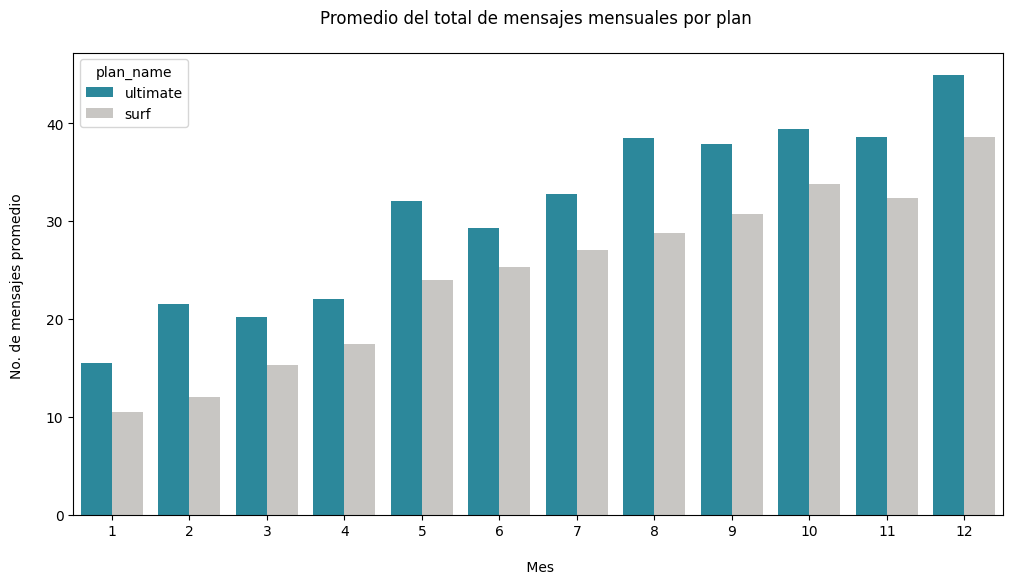

In [198]:
# Gráfico de barras para el promedio de número por plan y mes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}


sns.barplot(data=messages_sumamry, 
            x="month", y=("total_messages", "mean"), 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Promedio del total de mensajes mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("No. de mensajes promedio \n")
plt.show()

In [153]:
messages_by_plan

,user_id,month,plan_name,total_messages
0,1001,8,surf,30.0
1,1001,9,surf,44.0
2,1001,10,surf,53.0
3,1001,11,surf,36.0
4,1001,12,surf,44.0
...,...,...,...,...
2288,1493,9,ultimate,0.0
2289,1493,10,ultimate,0.0
2290,1493,11,ultimate,0.0
2291,1493,12,ultimate,0.0


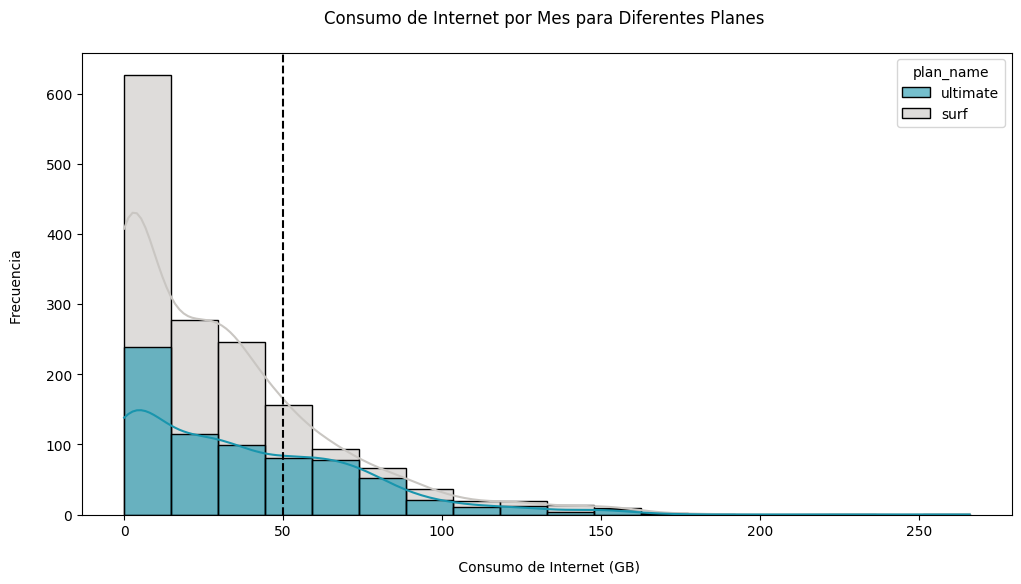

In [199]:
# Crea un histograma para el consumo de internet por mes
## Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#1995AD" , "#c9c6c2"]

## Histograma consumo
sns.histplot(data=messages_by_plan, 
            x="total_messages",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.6)
plt.title("Consumo de Internet por Mes para Diferentes Planes \n")
plt.xlabel(" \n Consumo de Internet (GB)")
plt.ylabel("Frecuencia \n")
plt.axvline(x=50, color="black", linestyle='--', label='Límite 50') # Límite de mensajes
plt.show()

Observamos que 

In [157]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_plans

,messages_included,mb_included,minutes_included,monthly_fee_usd,gb_extra_price,message_extra_price,minutes_extra_price,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

#### Comportamiento de internet

In [144]:
# Comprara el ntráfico de internet que tienden a enviar cada mes los usuarios de cada plan
## Seleccion de la información del plan de los usuarios
internet_by_plan = total_user_info[["user_id", "month", "plan_name","total_internet_gb"]]

## Generar resumen de datos
internet_sumamry = internet_by_plan.groupby(["plan_name", "month"]).agg({
    "total_internet_gb": ["size", "mean", "std", "median", "min", "max"]
})

internet_sumamry.round(1).sort_values(by=["month","plan_name"],ascending=True).reset_index()

plan_name month total_internet_gb                              
                                size  mean   std median  min   max
0       surf     1                 2   2.5   2.1    2.5  1.0   4.0
1   ultimate     1                 4   5.8   4.6    5.5  1.0  11.0
2       surf     2                 9   9.7   4.9   10.0  1.0  19.0
3   ultimate     2                 7  14.1   4.7   16.0  4.0  18.0
4       surf     3                23  11.3   7.8   10.0  0.0  29.0
5   ultimate     3                12  15.7  10.9   16.0  1.0  38.0
6       surf     4                50   9.7   7.2    8.5  0.0  28.0
7   ultimate     4                21  13.2   9.6   13.0  2.0  38.0
8       surf     5                77  11.1   7.7   10.0  0.0  37.0
9   ultimate     5                29  14.2   8.0   12.0  1.0  32.0
10      surf     6                97  12.3   7.0   12.0  0.0  36.0
11  ultimate     6                47  12.9   8.9   12.0  0.0  37.0
12      surf     7               121  13.5   7.9   13.0  0.0  39.0
13  ultimate     7                59  12.9   8.1   11.0  0.0  37.0
14      surf     8               162  13.4   8.3   13.0  0.0  50.0
15  ultimate     8                71  14.6   8.2   13.0  0.0  42.0
16      surf     9               194  13.4   7.2   12.5  0.0  37.0
17  ultimate     9                86  14.0   7.8   12.0  2.0  44.0
18      surf    10               237  13.6   7.8   12.0  0.0  43.0
19  ultimate    10               106  14.4   8.0   12.5  0.0  43.0
20      surf    11               283  13.0   7.7   12.0  0.0  42.0
21  ultimate    11               127  13.9   7.8   13.0  0.0  42.0
22      surf    12               318  14.7   8.6   13.5  0.0  70.0
23  ultimate    12               151  14.5   7.8   13.0  0.0  44.0

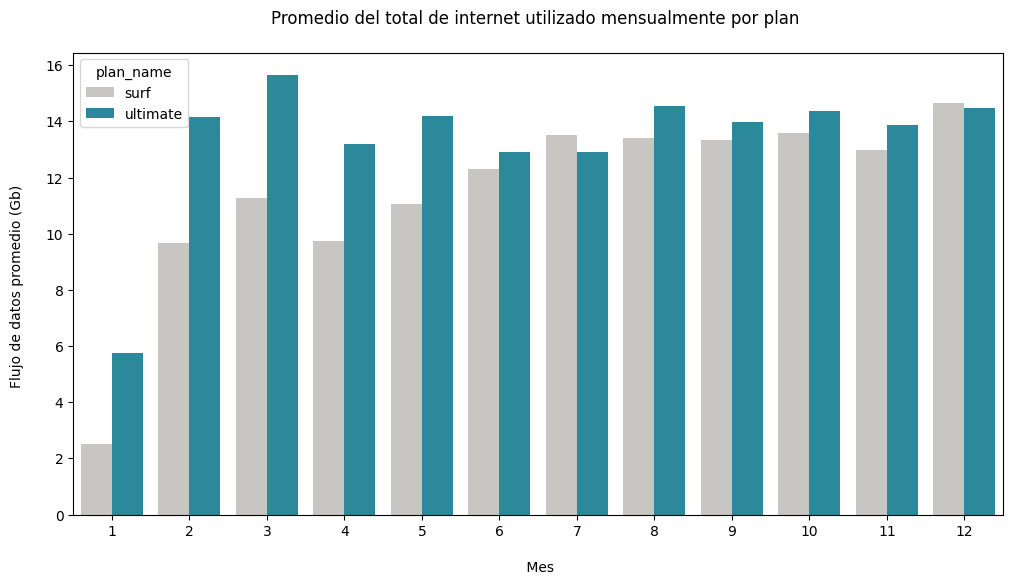

In [145]:
# Gráfico de barras para el promedio de número por plan y mes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}


sns.barplot(data=internet_sumamry, 
            x="month", y=("total_internet_gb", "mean"), 
            hue="plan_name", palette= custom_palette)

#plt.axhline(y=50, color='blue', linestyle='--', label='Límite mensajes plan Surf')
# plt.axhline(y=1000, color='red', linestyle='--', label='Límite mensajes plan Ultimate')

plt.title("Promedio del total de internet utilizado mensualmente por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("Flujo de datos promedio (Gb) \n")
plt.show()

In [ ]:
# Crea un histograma para el consumo de internet por mes
## Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#1995AD" , "#c9c6c2"]

## Histograma consumo
sns.histplot(data=messages_by_plan, 
            x="total_messages",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.6)
plt.title("Consumo de Internet por Mes para Diferentes Planes \n")
plt.xlabel(" \n Consumo de Internet (GB)")
plt.ylabel("Frecuencia \n")
plt.axvline(x=50, color="black", linestyle='--', label='Límite 50') # Límite de mensajes
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

### Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Pruebas de hipótesis

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [73]:
# Prueba las hipótesis



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [74]:
# Prueba las hipótesis



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]